# Lab 12 - Hyperparameter Tuning
#### Name: Jake Schaeffer
#### Class: CSCI 349 - Intro to Data Mining
#### Semester: Spring 2020
#### Instructor: Brian King

In [32]:
from sklearn.datasets import load_wine
import pandas as pd

#### 1) Read in the wine data frame using the code given above. It also gives you the names of the variables, which should align according to the data information given on the UCI web page.

In [33]:
names = ["alcohol","malic_acid","ash","alcalinity","Mg","tot_phenols","flavanoids",
"non_flav_phenols","proanthocyanins","color_intensity",
"hue","OD","proline"]
df_wine = pd.DataFrame(load_wine().data, columns = names)

In [34]:
df_wine["target"] = load_wine().target

#### 2) Prepare your data. Minimally, you should be reporting:  
a) shape, info(), etc  
b) describe()  
c) Cast the type of the variables accordingly, particularly the target class  
d) Report on any missing data  
e) Show the head() of the data frame  

In [35]:
#a
df_wine.shape

(178, 14)

In [36]:
#a
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol             178 non-null float64
malic_acid          178 non-null float64
ash                 178 non-null float64
alcalinity          178 non-null float64
Mg                  178 non-null float64
tot_phenols         178 non-null float64
flavanoids          178 non-null float64
non_flav_phenols    178 non-null float64
proanthocyanins     178 non-null float64
color_intensity     178 non-null float64
hue                 178 non-null float64
OD                  178 non-null float64
proline             178 non-null float64
target              178 non-null int32
dtypes: float64(13), int32(1)
memory usage: 18.9 KB


In [37]:
#b
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity,Mg,tot_phenols,flavanoids,non_flav_phenols,proanthocyanins,color_intensity,hue,OD,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [38]:
#c
df_wine["target"] = pd.Categorical(df_wine["target"])

In [39]:
#d
df_wine[df_wine.isnull() == True].dropna(how = "all")

,alcohol,malic_acid,ash,alcalinity,Mg,tot_phenols,flavanoids,non_flav_phenols,proanthocyanins,color_intensity,hue,OD,proline,target


In [40]:
#d
#no NaN values, so no data is missing

In [41]:
#e
df_wine.head() 

,alcohol,malic_acid,ash,alcalinity,Mg,tot_phenols,flavanoids,non_flav_phenols,proanthocyanins,color_intensity,hue,OD,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### 3) Perform your EDA. Minimally, you should be reporting:  
a) Distributions of the target class  
b) Distributions of the variables  
c) Distributions of the variables, given each target class. Numeric and visual summaries are useful here.  

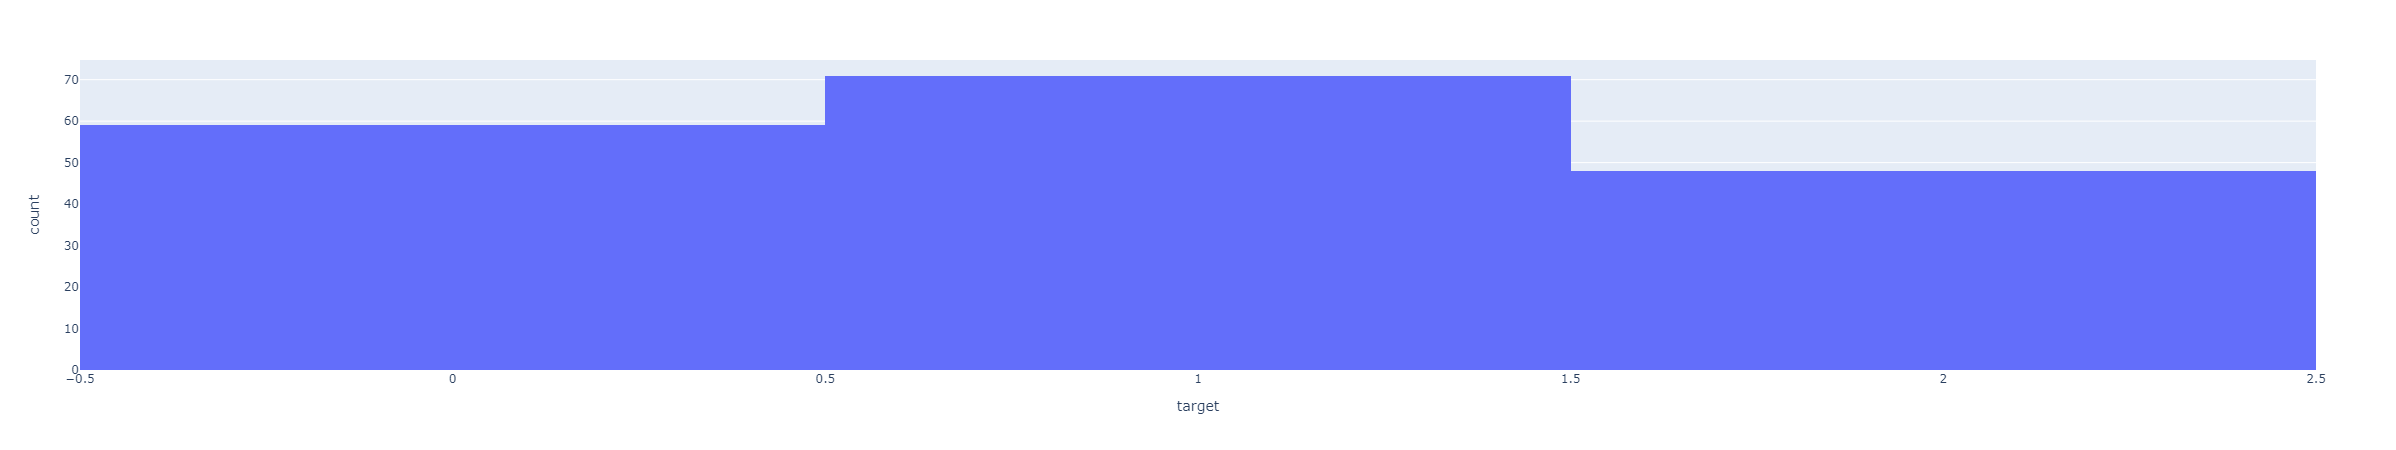

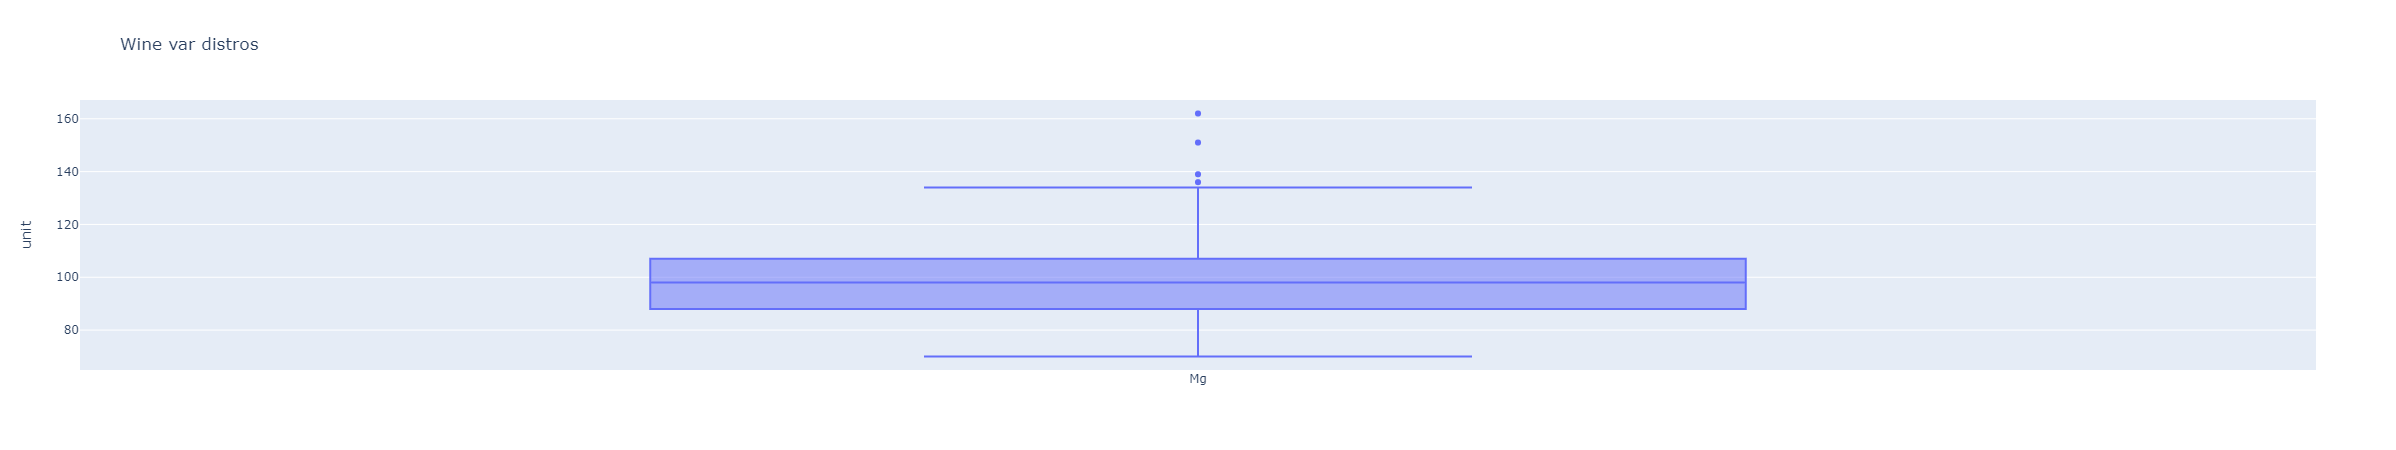

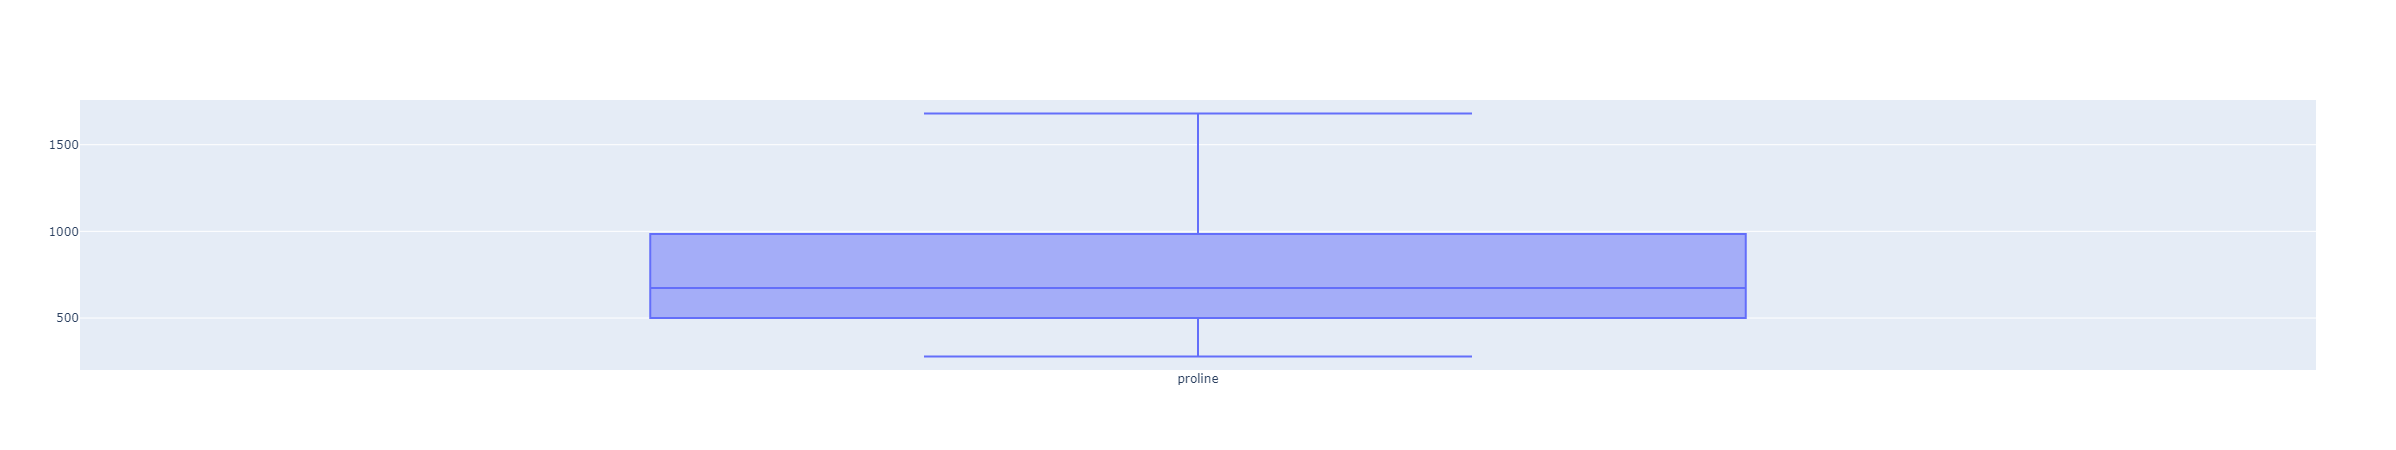

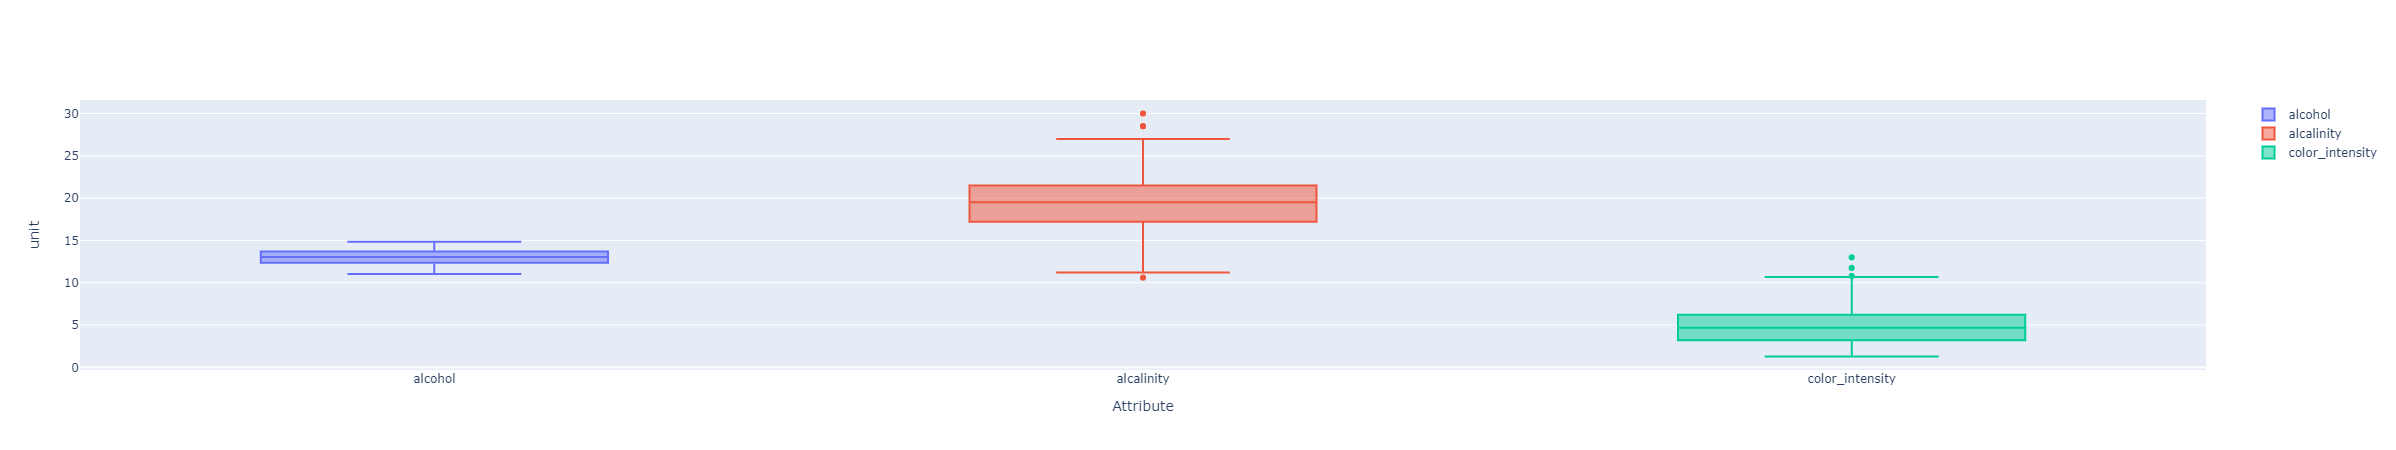

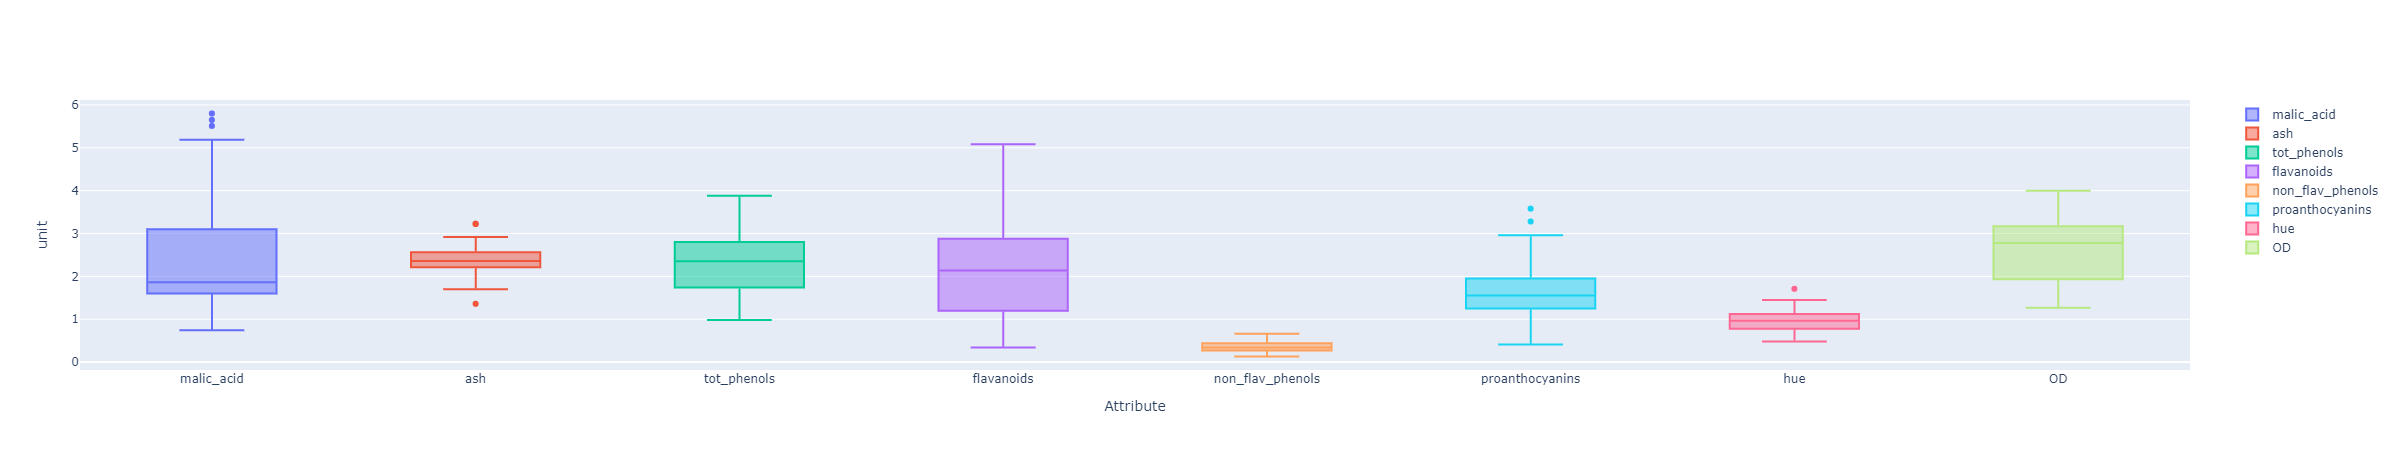

In [42]:
import plotly.graph_objects as go
lt5fig = go.Figure()
for col in df_wine.columns:
    if col == "target": continue
    if df_wine[col].max() <=6 :
        lt5fig.add_trace(go.Box(y=df_wine[col],name=col))
lt5fig.update_layout(
    xaxis_title="Attribute",
    yaxis_title="unit"
    )
gt5fig = go.Figure()
for col in df_wine.columns:
    if col == "target": continue
    if df_wine[col].max() >6 and col != "proline" and col != "Mg":
        gt5fig.add_trace(go.Box(y=df_wine[col],name=col))
gt5fig.update_layout(
    xaxis_title="Attribute",
    yaxis_title="unit"
    )
prolineFig = go.Figure()
prolineFig.add_trace(go.Box(y=df_wine["proline"],name="proline"))
mgFig = go.Figure()
mgFig.add_trace(go.Box(y=df_wine["Mg"],name="Mg"))
mgFig.update_layout(
    title="Wine var distros",
    yaxis_title="unit"
    )
import plotly.express as px
tarFig = px.histogram(df_wine, x="target")
tarFig.show()
mgFig.show()
prolineFig.show()
gt5fig.show()
lt5fig.show()

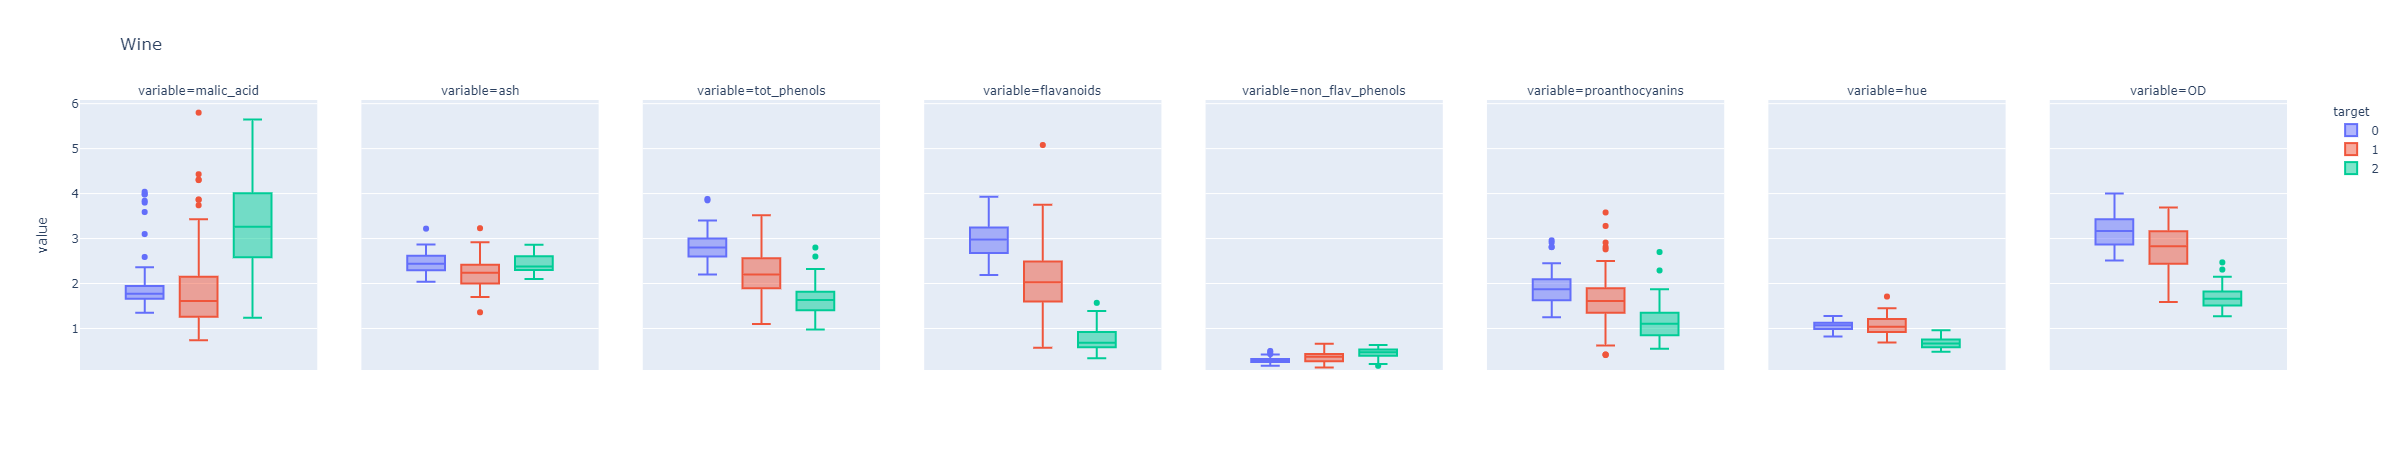

In [43]:
wineMelt = pd.melt(df_wine.drop(["proline","Mg","alcalinity","alcohol","color_intensity"],axis =1),id_vars = "target")
fig = px.box(wineMelt,y="value",facet_col="variable",color="target",title="Wine")
fig.show()

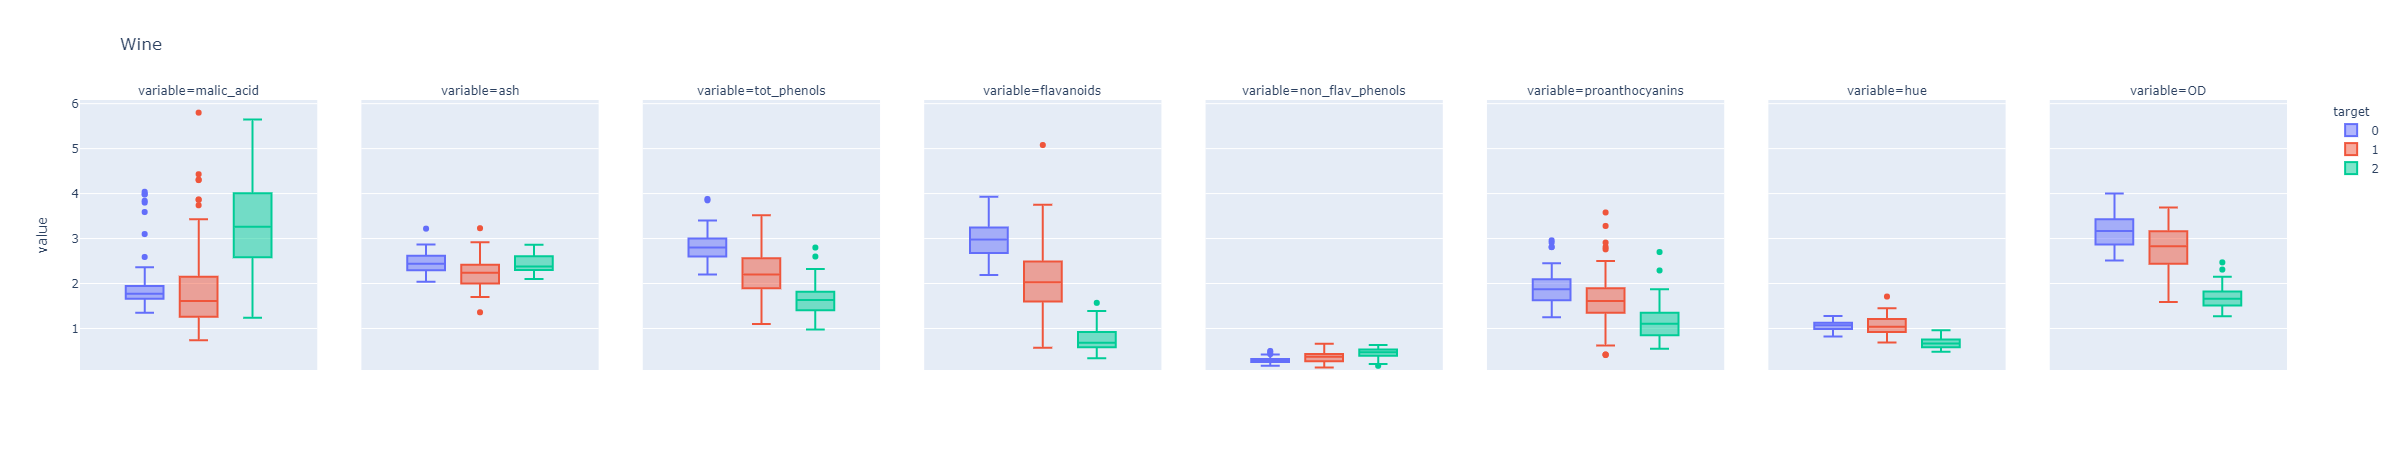

In [44]:
wineMelt = pd.melt(df_wine.drop(["proline","Mg","alcalinity","alcohol","color_intensity"],axis =1),id_vars = "target")
fig = px.box(wineMelt,y="value",facet_col="variable",color="target",title="Wine")
fig.show()

#### 4) Set up your X and y data frames to prepare for your modeling steps. Be sure to standardize your X variables. Create a binarized version of y as well. (Remember, this is important for classifiers such as neural nets when you are working with a target variable that is multi-class (i.e. more than two labels). And, again, it's very important that you shuffle your data.

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df_wine.drop("target",axis = 1)
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X),columns = X.columns)

y = df_wine["target"]
y = pd.get_dummies(y)

from sklearn.utils import shuffle
X = shuffle(X,random_state = 0)
y = shuffle(y,random_state = 0)

#### 5) Let's induce a basic Decision Tree Classifier (i.e. DecisionTreeClassifier()).
Don't set any initial
parameters. Let the default tree induction parameters be used. Evaluate the tree using a 5-fold cross
validation. Perform a standard report of your class-wide performance metrics (i.e. using classification report,
but specify 3 significant digits instead of the default of 2). You should have all of this code completed from a
previous lab.
#### What is the overall accuracy? Which class performs the best? The worst?

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import KFold

def wine5fold():
    clf = DecisionTreeClassifier()
    kfold = KFold(5,True)

    df_results = []

    for k, (train,test) in enumerate(kfold.split(X,y)):
        clf = DecisionTreeClassifier()
        clf.fit(X.iloc[train,:],y.iloc[train])
        df_results.append([y.iloc[test].values.tolist(),clf.predict(X.iloc[test,:])])


    df_results = pd.DataFrame(df_results,columns=["true","pred"])
    #df_results["true"] = df_results["true"].apply(lambda x: [e[0] for e in x])
    df_def = pd.DataFrame({"true":df_results.explode("true").iloc[:,0],"pred":df_results.explode("pred").iloc[:,1]}).reset_index(drop = True)
    df_def["true"] = df_def["true"].apply(lambda x: [i for i in range(len(x)) if x[i] == 1][0])
    df_def["pred"] = df_def["pred"].apply(lambda x: [i for i in range(len(x)) if x[i] == 1][0])
    print(classification_report(df_def["true"],df_def["pred"],digits = 3))

In [47]:
wine5fold()
#Overall 92% accurate, with class 0 performing the best and 1 perforing the worst.

              precision    recall  f1-score   support

           0      0.917     0.932     0.924        59
           1      0.900     0.887     0.894        71
           2      0.917     0.917     0.917        48

    accuracy                          0.910       178
   macro avg      0.911     0.912     0.912       178
weighted avg      0.910     0.910     0.910       178



#### 6) Try to run your code above a few different times. Your performance results should fluctuate a bit. Why?

In [48]:
wine5fold()
wine5fold()
wine5fold()
#fluctuates because it is reshuffled everytime with different folds.

              precision    recall  f1-score   support

           0      0.879     0.983     0.928        59
           1      0.938     0.845     0.889        71
           2      0.896     0.896     0.896        48

    accuracy                          0.904       178
   macro avg      0.904     0.908     0.904       178
weighted avg      0.907     0.904     0.904       178

              precision    recall  f1-score   support

           0      1.000     0.949     0.974        59
           1      0.905     0.944     0.924        71
           2      0.917     0.917     0.917        48

    accuracy                          0.938       178
   macro avg      0.941     0.936     0.938       178
weighted avg      0.940     0.938     0.939       178

              precision    recall  f1-score   support

           0      0.885     0.915     0.900        59
           1      0.879     0.817     0.847        71
           2      0.882     0.938     0.909        48

    accuracy        

#### 7) As we learned, a decision tree has a lot of parameters. Likewise, the DecisionTreeClassifier class offers thoseparameters for you to affect your tree induction.

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {
'criterion' : ['gini', 'entropy'],
'max_depth' : [3,4,5,6,7]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid,return_train_score=True, cv=5)
grid_result = grid.fit(X,y)

#### 8) Cool! Now, you need to explore the internal attributes of grid_result. It contains a LOT of information.
Look closely at the description of the return value on the documentation page for GridSearchCV. Then,
show the best score, along with the best parameters for that score. (HINT best_score_ and
best_params_)

In [50]:
print("Best Score: {}".format(grid_result.best_score_))
print("Best Params: {}".format(grid_result.best_params_))

Best Score: 0.9326984126984128
Best Params: {'criterion': 'gini', 'max_depth': 7}


#### 9) [M] What does the best "score" represent? What performance metric? How do you override it, if, for example, you want to use f1_macro?


Best score is the best accuracy. The percentage of classifications that were correct. To override it, we can change the scoring parameter passed to GridSearchCV. So we could say scoring = "fl_macro" within the GridSearchCV() call.

#### 10) Write the code to report the mean training and testing score and standard deviation for every parametercombination tested. Output your data in order of highest mean test score to lowest. How did you docompared to the default decision tree without any parameters? 
(HINT: This is easily done by casting the
cv_results_ parameter to a DataFrame, and then using standard pandas data selection and sorting
methods.)

In [60]:
resultDF = pd.DataFrame(grid_result.cv_results_)
resultDF.sort_values(by = "mean_test_score",ascending = False)[["params","mean_test_score","std_test_score","mean_train_score","std_train_score"]]
#This does much better than the default decision tree.

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
4,"{'criterion': 'gini', 'max_depth': 7}",0.932698,0.033399,1.000000,0.000000
3,"{'criterion': 'gini', 'max_depth': 6}",0.927143,0.041542,1.000000,0.000000
7,"{'criterion': 'entropy', 'max_depth': 5}",0.921429,0.044758,1.000000,0.000000
2,"{'criterion': 'gini', 'max_depth': 5}",0.916032,0.049521,1.000000,0.000000
6,"{'criterion': 'entropy', 'max_depth': 4}",0.916032,0.061160,0.998592,0.002817
0,"{'criterion': 'gini', 'max_depth': 3}",0.916032,0.060720,0.983158,0.010464
9,"{'criterion': 'entropy', 'max_depth': 7}",0.910476,0.069159,1.000000,0.000000
5,"{'criterion': 'entropy', 'max_depth': 3}",0.903968,0.100182,0.964976,0.045725
8,"{'criterion': 'entropy', 'max_depth': 6}",0.899206,0.081605,1.000000,0.000000
1,"{'criterion': 'gini', 'max_depth': 4}",0.893651,0.081172,0.990210,0.019580


#### 11) The default scoring parameter is accuracy, and you've already learned about how accuracy is not necessarily the best metric on unbalanced data. This data is only slightly unbalanced, thus it is not a bad metric. However, you should understand how to choose a better scoring metric to identify the best results for these data.
In general, a macro-averaged f1 metric is a pretty good assessment of classifier performance when you have
unbalanced data, as it will give you an honest assessment of how you are doing on the smallest classes.
Redo the above steps, but you must accomplish three things:
  
    a) Add min_samples_split and min_samples_leaf criteria to your grid search. Choose the
    parameter values that make sense to you.  

    b) Specify the scoring parameter to use both accuracy AND f1_macro. You'll likely also need to
    specify the refit parameter. (Look these up! Don't just blindly do what I'm telling you to do without
    understanding!)  

    c) Change your result to a full 10-fold cross validation. This could take some time, but gives a better
    assessment of the power of your classifier. Perhaps using 5 fold just wasn't quite enough data for each
    member?  

Again, output your results, showing the top five configurations by accuracy, and also by f1_macro.
Comment on your results.  

In [68]:
param_grid = {
'criterion' : ['gini', 'entropy'],
'max_depth' : [3,4,5,6,7],
"min_samples_split": [2,5] ,
"min_samples_leaf" : [1,2] 
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid,return_train_score=True, cv=10, scoring = ["accuracy", "f1_macro"], refit = False)
grid_result = grid.fit(X,y)
resultDF = pd.DataFrame(grid_result.cv_results_)

In [92]:
resultDF.sort_values(by = "mean_train_f1_macro",ascending = False)[["params","mean_train_accuracy","mean_train_f1_macro","mean_test_accuracy","mean_test_f1_macro"]].head()
#shows that high depth and low min samples works most effectively

,params,mean_train_accuracy,mean_train_f1_macro,mean_test_accuracy,mean_test_f1_macro
12,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",1.00000,1.00000,0.910131,0.900187
36,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",1.00000,1.00000,0.926797,0.920265
16,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",1.00000,1.00000,0.921569,0.908349
32,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",1.00000,1.00000,0.926797,0.920265
28,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.99875,0.99933,0.921242,0.915076


In [93]:
resultDF.sort_values(by = "mean_train_accuracy",ascending = False)[["params","mean_train_accuracy","mean_train_f1_macro","mean_test_accuracy","mean_test_f1_macro"]].head()
#Depth is more important than criterion. higher depth gave better f1 macro than a different criterion

,params,mean_train_accuracy,mean_train_f1_macro,mean_test_accuracy,mean_test_f1_macro
16,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",1.000000,1.000000,0.921569,0.908349
36,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",1.000000,1.000000,0.926797,0.920265
32,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",1.000000,1.000000,0.926797,0.920265
12,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",1.000000,1.000000,0.910131,0.900187
8,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.998758,0.998881,0.911111,0.896741


#### 12) [M] Discuss your findings. Did 10-fold make a difference? Did the additional parameters make a difference?

10 fold  and the addition parameters did not make a difference. The default values actually worked better.

#### 13) Most of you should have some sort of multicore processor, even on the simplest laptops. You can easily take advantage of this. 
The default configuration of GridSearchCV is to NOT use any parallel processing, thus
evaluating one model at a time. However, you could perhaps do 2 at a time! Do you have a CPU with more
than 1 core? (Yes, you most likely do!)
Redo the above, but try out the parameter n_jobs=2 (I also sometimes set pre_dispatch to the same
number as n_jobs, just to control too much memory usage. Not really important for decision trees, but
could be important for larger models. If you have a really juicy machine, try an even higher value of n_jobs.
(NOTE: Don't go higher than the number of cores in your machine as you will slow down quite a bit.
Experiment by starting with only 2, and incrementally increase. NOTE: Parallel jobs for large models such as
neural nets can sometimes fail with a memory error. If this happens, just run with n_jobs=1.)
If you are able, do some basic time comparisons with different values of n_jobs, just to see how much time
you save by parallelizing your grid search. If you set it too high, you will start to discover diminishing returns,
and will harm your timing more then help, so back off the value. I typically do something simple:
import time
start_ts = time.time()
grid_result = grid.fit(X,y)
end_ts = time.time()
print("Time in seconds", end-ts - start_ts)

OK – You should notice that you were able to get better results by doing hyperparameter tuning (not to mention
that an improved CV helped.) And, you should have noticed quite a boost in time by simply doubling the number of
jobs you are completing simultaneously.
Depending on the number of parameters you choose, and the cv value, and most importantly, the model,
this can take an extraordinarily long time! Like, seriously long. Like, if you are not careful, you could be
wait days for results! Serious grid search for hyperparameter tuning is typically very CPU intensive (and
memory intensive for large datasets.) So, ALWAYS START SIMPLE! Use only a few parameters to explore,
with few values, and a small CV number to start with. With neural nets, choose a small number of epochs
to begin. Why? Confirm you are getting decent results first! Then, let your obsessive side kick into high
gear, set your system to evaluate many different parameters, and then typically, you go to bed. J

In [99]:
param_grid = {
'criterion' : ['gini', 'entropy'],
'max_depth' : [3,4,5,6,7],
"min_samples_split": [2,5] ,
"min_samples_leaf" : [1,2] 
}



import time
for jobs in range(1,8):
    start_ts = time.time()
    grid = GridSearchCV(DecisionTreeClassifier(), param_grid,return_train_score=True, cv=10, scoring = ["accuracy", "f1_macro"], refit = False,n_jobs = jobs)
    grid_result = grid.fit(X,y)
    end_ts = time.time()
    print("Time in seconds", end_ts - start_ts)

resultDF = pd.DataFrame(grid_result.cv_results_)
#4 jobs at a time performed fastest

Time in seconds 3.369025468826294
Time in seconds 3.355405807495117
Time in seconds 2.7651987075805664
Time in seconds 1.760296106338501
Time in seconds 3.0986931324005127
Time in seconds 1.7943248748779297
Time in seconds 1.9098429679870605


#### 14) OK. Now on to hyperparameter tuning for Keras. (CONSIDER YOURSELF WARNED! 
Neural nets take a long time
to train compared to decision trees!) From the previous lab, copy over your code for the function
create_keras_model(). Now, modify your base neural net structure to match the inputs and outputs
for the wine dataset you are working on for this lab.
Modify the parameters of your function to allow you to pass model parameters of interest. In particular, you
are going to want to evaluate a different optimizer and activation values for the hidden layer, and
vary the number of hidden units. Modify your function to take these three additional parameters. You may
name the parameters whatever you want, though generally it's good to keep them the same as the actual
parameters used as you build your model.
Once you have your new function, create your Keras classifier with KerasClassifier(). When you call
this function, this is where you pass parameters such as epochs and batch_size. You don't want to wait
long, so just use epochs=5 and a batch_size=4. (I would advise starting with verbose=1, just to make
sure your model is training properly, and you notice the accuracy increasing and loss decreasing, then set
verbose=0 when doing a bigger grid search on the next step.)
Test out your KerasClassifier() instance with the cross_val_predict() method you learned
about in the previous lab, and print the results of classification_report. You can try to vary some
parameters if you want, but don't spend a lot of time here.

In [123]:
from keras.models import Sequential
from keras.layers import Dense, Activation
def create_keras_model(optimizer,activation,units):
        #different optimizer
        #different activation for hidden layer
        #vary number of hidden units
    model = Sequential([Dense(units = units,input_shape = (len(X.columns),)),Activation(activation),Dense(units = 3),Activation(activation)])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy",metrics=["accuracy"])
    return model

#create classifier - Keras Classifier()
#then pass params such as epochs= 5 and batch+soize = 4, verbose = 1. verbose = 0  awhen we do next....
from keras.wrappers.scikit_learn import KerasClassifier
clf = KerasClassifier(build_fn=create_keras_model, verbose=1, epochs=5,batch_size=4)
#test keras classifier with cross_val_preduxt() and print results of classification report
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(DecisionTreeClassifier(),X,y,cv=10)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        59
           1       0.90      0.86      0.88        71
           2       0.90      0.94      0.92        48

   micro avg       0.90      0.90      0.90       178
   macro avg       0.90      0.91      0.91       178
weighted avg       0.90      0.90      0.90       178
 samples avg       0.90      0.90      0.90       178



#### 15) Use GridSearchCV on Keras (and prepare to wait several minutes!) 
First, create a param_grid
dictionary. You must, minimally, specify the following keys:
a) 'optimizer' : ['adam','sgd']
b) number of hidden units : 2 different numbers of your choice
c) 'activation' : ['relu']
d) 'epochs' : [5, 10]
e) 'batch_size' : [4, 8]
Create a new classifier, but be sure verbose=0. Then, just like you did with the decision tree, wrap that
classifier model in a GridSearchCV instance. Use a cross validation of 5 (though you can try more if you
want.) Report your best model hyperparameters
You should get some pretty good results!

In [124]:
param_grid = { 'optimizer' : ['adam','sgd']
              ,"units": [1,10] 
              ,'activation' : ['relu']
              ,'epochs' : [5, 10]
              ,'batch_size' : [4, 8]}
clf = KerasClassifier(build_fn=create_keras_model, verbose=0, epochs=5,batch_size=4)

grid = GridSearchCV(clf, param_grid,return_train_score=True, cv=5,n_jobs = 4)
grid_result = grid.fit(X,y)

#### 16) Study your results. Can you do even better? How close can you get to 100% accuracy on a 5- or 10-fold cross
validation with Keras? Try a different activation... say... 'tanh'. Perhaps a few more hidden units? A bit
larger batch size, but more epochs? See what happens....

In [133]:
resultDF = pd.DataFrame(grid_result.cv_results_)
resultDF.sort_values(by = 'mean_train_score', ascending = False)["mean_train_score"]

3     0.457353
7     0.455954
15    0.455954
9     0.452605
0     0.331478
1     0.331478
2     0.331478
4     0.331478
5     0.331478
6     0.331478
8     0.331478
10    0.331478
11    0.331478
12    0.331478
13    0.331478
14    0.331478
Name: mean_train_score, dtype: float64